# Random Forest Regression:

### The Data

- We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

- They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [114]:
df= pd.read_csv("rock_density_xray.csv")

In [115]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [116]:
df.shape

(300, 2)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [118]:
df.describe()

,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [119]:
# Changing Column Names to Something Simple.
df.columns = ["Signal", "Density"]

In [120]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


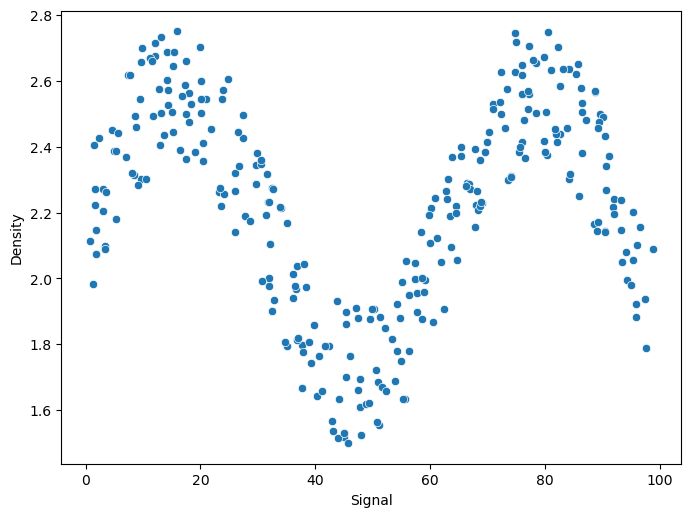

In [121]:
plt.figure(figsize= (8,6), dpi= 100)

sns.scatterplot(data= df, x= "Signal", y= "Density")

plt.show()

### Train Test Split:

In [122]:
# Feature:

x = df[["Signal"]]

In [123]:
x.head()

,Signal
0,72.945124
1,14.229877
2,36.597334
3,9.578899
4,21.765897


In [124]:
# Target:

y= df["Density"]

In [125]:
y.head()

0    2.456548
1    2.601719
2    1.967004
3    2.300439
4    2.452374
Name: Density, dtype: float64

In [126]:
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [127]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 1)
(60, 1)
(240,)
(60,)


### Scalling:

In [128]:
sc = StandardScaler()

In [129]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,Signal
0,0.615621
1,-0.831454
2,0.796040
3,1.470458
4,-1.627182


In [130]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,Signal
0,0.564396
1,1.701701
2,0.820802
3,0.615996
4,1.178135


### Model:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [131]:
model = RandomForestRegressor()

In [132]:
param_dict = {"n_estimators" : [1,10,50,100,200],
             "bootstrap" : [True, False],
             "oob_score" : [True,False]}

In [133]:
grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv= 5)

In [134]:
grid_model.fit(x_train, y_train)

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [1, 10, 50, 100, 200],
                         'oob_score': [True, False]})

In [135]:
grid_model.best_estimator_

RandomForestRegressor(oob_score=True)

In [136]:
grid_model.best_params_

{'bootstrap': True, 'n_estimators': 100, 'oob_score': True}

In [137]:
grid_model.best_score_

0.7319825351572421

In [142]:
grid_model.best_estimator_.oob_score_

0.7330338050828547

### Model Evaluation:

In [138]:
pred = grid_model.predict(x_test)

In [139]:
r2_score(y_test, pred)

0.7694424550472555

In [140]:
mean_absolute_error(y_test, pred)

0.128924585058806

In [141]:
np.sqrt(mean_squared_error(y_test, pred))

0.1553675765557404